In [1]:
import numpy as np

bankroll = np.empty([1000,3001],dtype = float)

In [2]:
#set starting point at 1000€ for all random variables

bankroll[:,0] = 1000

In [3]:
kelly = 0.024
average = 1.268

In [4]:
betresult = np.empty([1000,3000],dtype = float)
betsize = np.empty([1000,3000],dtype = float)

for i in range (1000):
    
    for j in range (3000):

        betsize[i,j] = bankroll[i,j] * kelly
        betresult[i,j] = np.random.choice([0,1],p = [0.55,0.45])
        if(betresult[i,j] == 0):
            bankroll[i,j+1] = bankroll[i,j] - betsize[i,j]
        if(betresult[i,j] == 1):
            bankroll[i,j+1] = bankroll[i,j] + betsize[i,j]*average

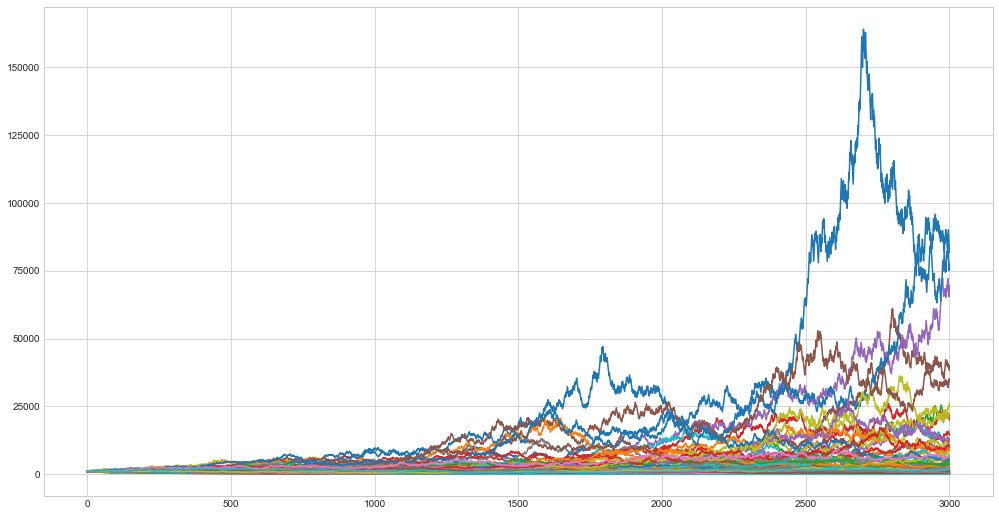

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=[17,9])
ax = plt.axes()

for i in range(1000):
    x = np.linspace(0,3000,num = 3001)
    ax.plot(x,bankroll[i])

In [5]:
# expected value function

Eval = bankroll.mean(0)

In [6]:
Variance = bankroll.var(0)

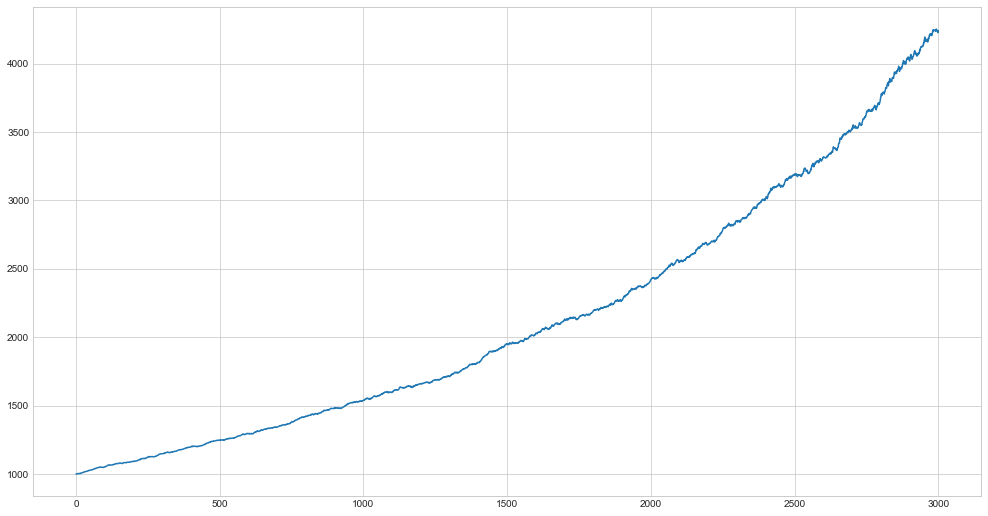

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=[17,9])
ax = plt.axes()
x = np.linspace(0,3000,num = 3001)
ax.plot(x,Eval)

In [8]:
# final range check

under = 0 # 0<under<1000
range1 = 0 # 1000<=range1<2000
range2 = 0 # 2000<=range2<4000
range3 = 0 # 4000<=range3<7000
range4 = 0 # 7000<=range4<12000
range5 = 0 # 12000<=range5<20000
range6 = 0 # 20000<=range6<40000
range7 = 0 # range7>=40000

for i in range(1000):
    if(bankroll[i,3000] < 1000):
        under += 1
    if(1000 <= bankroll[i,3000] < 2000):
        range1 += 1
    if(2000 <= bankroll[i,3000] < 4000):
        range2 += 1
    if(4000 <= bankroll[i,3000] < 7000):
        range3 += 1
    if(7000 <= bankroll[i,3000] < 12000):
        range4 += 1
    if(12000 <= bankroll[i,3000] < 20000):
        range5 += 1   
    if(20000 <= bankroll[i,3000] < 40000):
        range6 += 1
    if(bankroll[i,3000] >= 40000):
        range7 += 1

In [18]:
print("<1k: ",under)
print("1k-2k: ",range1)
print("2k-4k: ",range2)
print("4k-7k: ",range3)
print("7k-12k: ",range4)
print("12k-20k: ",range5)
print("20k-40k: ",range6)
print(">40k: ",range7)

<1k:  389
1k-2k:  206
2k-4k:  170
4k-7k:  91
7k-12k:  61
12k-20k:  41
20k-40k:  30
>40k:  12


In [10]:
under+range1+range2+range3+range4+range5+range6+range7

1000

In [34]:
ranges = [under,range1,range2,range3,range4,range5,range6,range7]
ranges

[38, 18, 16, 8, 7, 5, 5, 3]

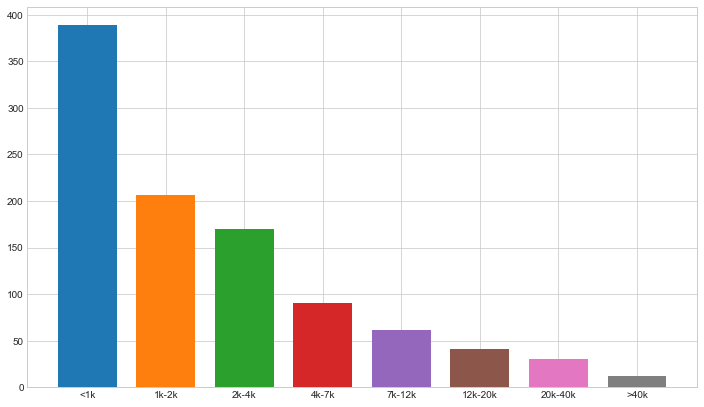

In [11]:

import matplotlib.pyplot as plt

xt = [1,3,5,7,9,11,13,15]

fig = plt.figure(figsize=[12,7])

plt.xticks(xt, ('<1k', '1k-2k', '2k-4k', '4k-7k','7k-12k','12k-20k','20k-40k','>40k'))
plt.bar(x = 1, height = under, width = 1.5, align = 'center')
plt.bar(x = 3, height = range1, width = 1.5, align = 'center')
plt.bar(x = 5, height = range2, width = 1.5, align = 'center')
plt.bar(x = 7, height = range3, width = 1.5, align = 'center')
plt.bar(x = 9, height = range4, width = 1.5, align = 'center')
plt.bar(x = 11, height = range5, width = 1.5, align = 'center')
plt.bar(x = 13, height = range6, width = 1.5, align = 'center')
plt.bar(x = 15, height = range7, width = 1.5, align = 'center')


plt.show()